In [1]:
import os
import sys
from pathlib import Path

lib_dir = Path("..") #folder cotainiing dir paysim_analysis
module_path = os.path.abspath(os.path.join(lib_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
from paysim_analysis.data_sampling import *
from paysim_analysis.visualization import *
from paysim_analysis.utils import get_project_folder

In [3]:
dir_ = get_project_folder().parent / "data" 
df = pd.read_csv(dir_ / "processed/PS_20174392719_1491204439457_log.csv")
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,avgAmtOrigStep,countOrigStep,avgAmtOrig,countOrig,avgAmtDestStep,countDestStep,avgAmtDest,countDest,is_CASH_OUT,isFraud
0,-1.701805,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259,-0.357467,-0.003063,-0.357680,-0.0358,-0.366704,-0.268293,-0.137416,1.77898,False,True
1,-1.666499,-0.233783,-0.023046,-0.106389,-0.403155,-0.414743,-0.233784,-0.003063,-0.233923,-0.0358,-0.239825,-0.268293,-0.137416,1.77898,False,False
2,-1.652376,-0.231940,-0.180229,-0.106389,-0.379553,-0.437136,-0.231940,-0.003063,-0.232078,-0.0358,-0.237933,-0.268293,-0.137416,1.77898,True,False
3,-1.645315,1.272583,0.071584,-0.106389,-0.401911,-0.156526,1.272584,-0.003063,1.273341,-0.0358,1.305468,-0.268293,-0.137416,1.77898,False,False
4,-1.610009,0.026233,-0.189568,-0.106389,-0.094569,-0.142163,0.026233,-0.003063,0.026249,-0.0358,0.026911,-0.268293,-0.137416,1.77898,True,False


In [4]:
target = "isFraud"
cols = [c for c in df.columns if c!= target]
palette = {True: "red", False:"blue"}
graph_sample = 8000

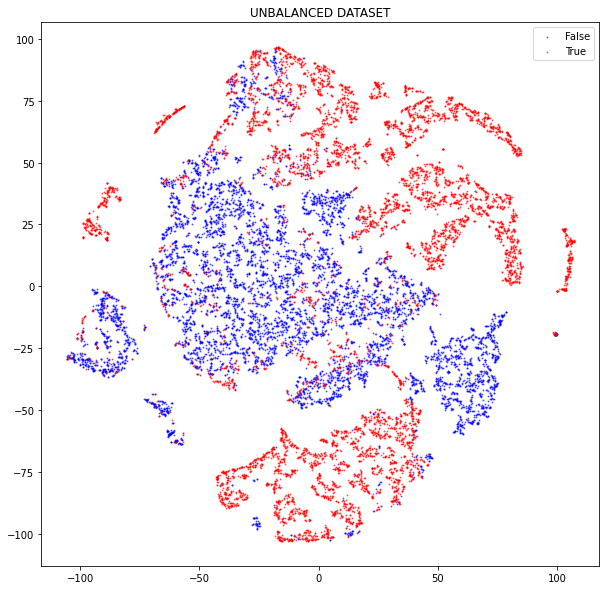

In [5]:
X, Y = get_2D_components(df, target, n_sample= 8000)
plot_scatter(X,Y, palette, "UNBALANCED DATASET")

### Undersampling through Tomek links
Tomek Links method selects all pairs of observation (`a`, `b`) such that, a and b are nearest neighbor and belong to different classes (i.e. tomek link).

The algorithm remove only 1052 data records. Data are still unbalanced.
Since the dimensionality reduction is not significative, we do not use this confriguration in the further analysis. 

The following cell requires 15 mins to run.

### Undersampling via KNN (Near Miss Unersampling)
For each fraud data point, a sample of closest negative examples is extracted (to be sure that all positive points is surrounded from some negative example).

In [6]:
%%time
near_miss_df = undersampling_nearmiss(df, target)
near_miss_df = near_miss_df.astype(df.dtypes.to_dict())

near_miss_df.to_csv(dir_ / "balanced_datasets/near_miss3_balanced.csv", index=False)
print(near_miss_df.shape)

(16426, 16)
CPU times: user 55.1 s, sys: 1.68 s, total: 56.8 s
Wall time: 57.4 s


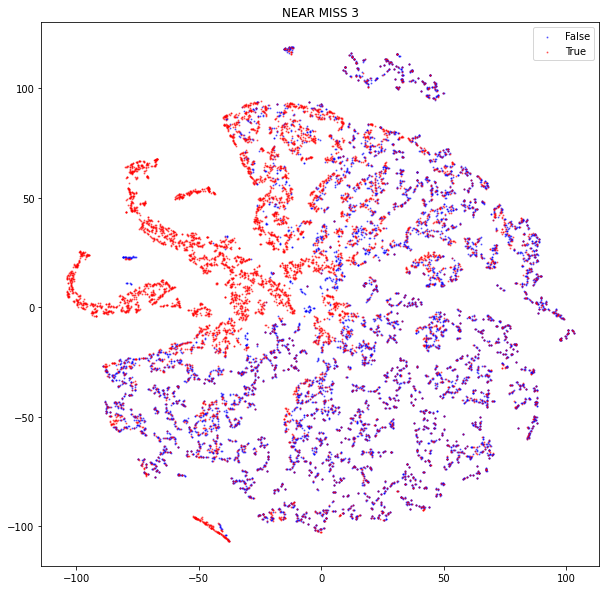

In [7]:
X, Y = get_2D_components(near_miss_df, target, graph_sample)
plot_scatter(X,Y, palette, "NEAR MISS 3")

### Hybrid Approach

A the original paper on SMOTE suggestes, we combine SMOTE with random undersampling of the majority class.

In [8]:
%%time
smote_df = hibryd_sampling_with_smote(df, target, n_per_class=200000)
smote_df.to_csv(dir_ / "balanced_datasets/smote_balanced.csv", index=False)
print(smote_df.shape)

(400000, 16)
CPU times: user 13.9 s, sys: 960 ms, total: 14.8 s
Wall time: 15 s


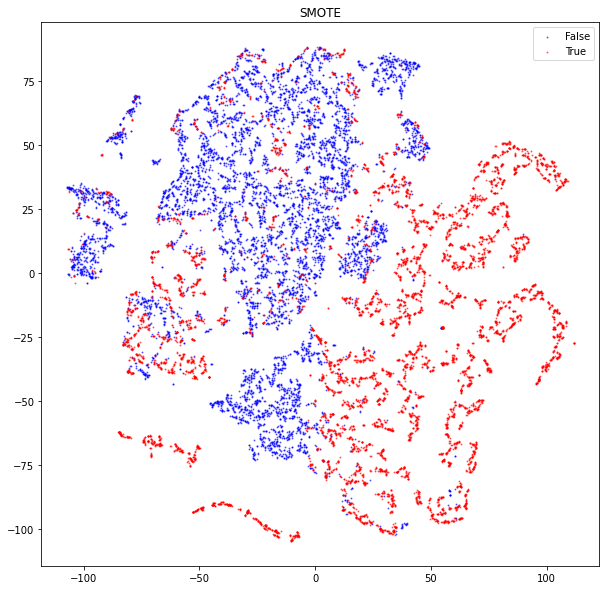

In [9]:
X, Y = get_2D_components(smote_df, target, n_sample=graph_sample)
plot_scatter(X,Y, palette, "SMOTE")